<a href="https://colab.research.google.com/github/Paolino1994/IntroIA/blob/main/Integrador%20Clase%204/Regresion_Lineal_y_Polinomica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.datasets import make_blobs
import matplotlib.colors as mcolors
from functools import partial

In [243]:
#Levantar Dataset 
#Uso la clase que nicolas nos proveyo, pero el cambio la funcion
Dataset=""
class Data(object):

    def __init__(self,function,n):
        self.function=function

        self.X, self.y = self.build_dataset(n)
        
        
    ####@staticmethod
    #def _analytic_function(X):
    #    return  np.cos(X)
        

    def build_dataset(self, n):
        N = n
        sigma_epsilon = 1
        x_max = 15
        x = x_max * (2 * np.random.rand(N) - 1)
        epsilon = sigma_epsilon * np.random.randn(N)
        y = self.function(x)
        y = y + epsilon
        return x, y

    def split(self, percentage):
        X = self.X
        y = self.y

        permuted_idxs = np.random.permutation(X.shape[0])

        train_idxs = permuted_idxs[0:int(percentage * X.shape[0])]

        test_idxs = permuted_idxs[int(percentage * X.shape[0]): X.shape[0]]

        X_train = X[train_idxs]
        X_test = X[test_idxs]

        y_train = y[train_idxs]
        y_test = y[test_idxs]

        return X_train, X_test, y_train, y_test
    
    def plot_original(self):
        plt.figure(figsize=(12, 6))
        x_range = np.linspace(-3, 3, 1000)
        plt.scatter(self.X, self.y)
        plt.plot(x_range, self.function(x_range), 'r', linewidth=3.0)
        plt.xlabel('x', size=12)
        plt.ylabel('y', size=12)
        plt.xticks(np.arange(-3, 3 + 1))
        plt.show()

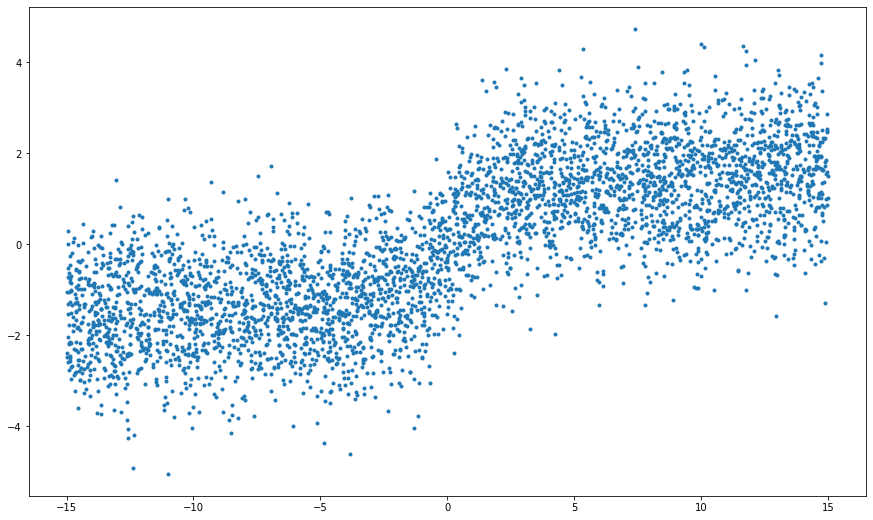

In [244]:
def f_hat(x, w):
    d = len(w) - 1
    return np.sum(w * np.power(x, np.expand_dims(np.arange(d, -1, -1), 1)).T, 1)
samples=5000
#Defino que funcion quiero para simular
myFunction=np.arctan
dataset = Data(myFunction,samples)
X_train, X_test, y_train, y_test = dataset.split(0.8)

x_train=X_train
y_train=y_train
x_test=X_test
y_train=y_train
fig, axs = plt.subplots(1,sharey=True, figsize=(15, 9))
axs.plot(x_train,y_train,".")

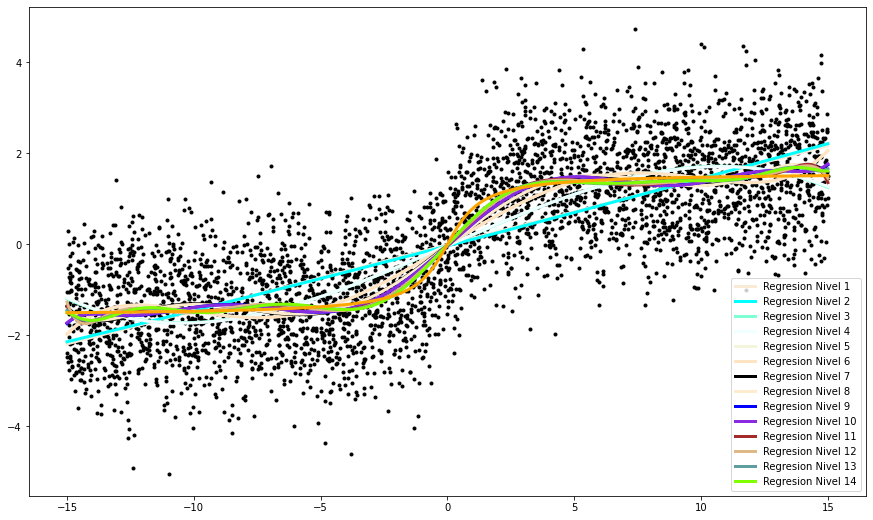

In [245]:
#Veo mis datos superpuestos con varias regresiones
#Regresiones Polinomicas
colores=list(mcolors.CSS4_COLORS.keys())
cantidadDeRegresionesFrom=1
cantidadDeRegresionesTo=15
regresiones=[]

#fig,axs=plt.plot(range(len(y_train)),y_train)
fig, axs = plt.subplots(1,sharey=True, figsize=(15, 9))
axs.plot(x_train,y_train,".",color="Black")
x_range=np.linspace(-15, 15, samples)

for regresion in range(cantidadDeRegresionesFrom,cantidadDeRegresionesTo):
  regresiones.append(np.polyfit(x_train,y_train,regresion))
  axs.plot(x_range, f_hat(x_range, regresiones[regresion-cantidadDeRegresionesFrom]), linewidth=3.0,color=colores[regresion],label='Regresion Nivel '+str(regresion))

  axs.legend()

  #print(regresiones)
#Print original function
axs.plot(x_range, myFunction(x_range), linewidth=3.0,color="Orange")





/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


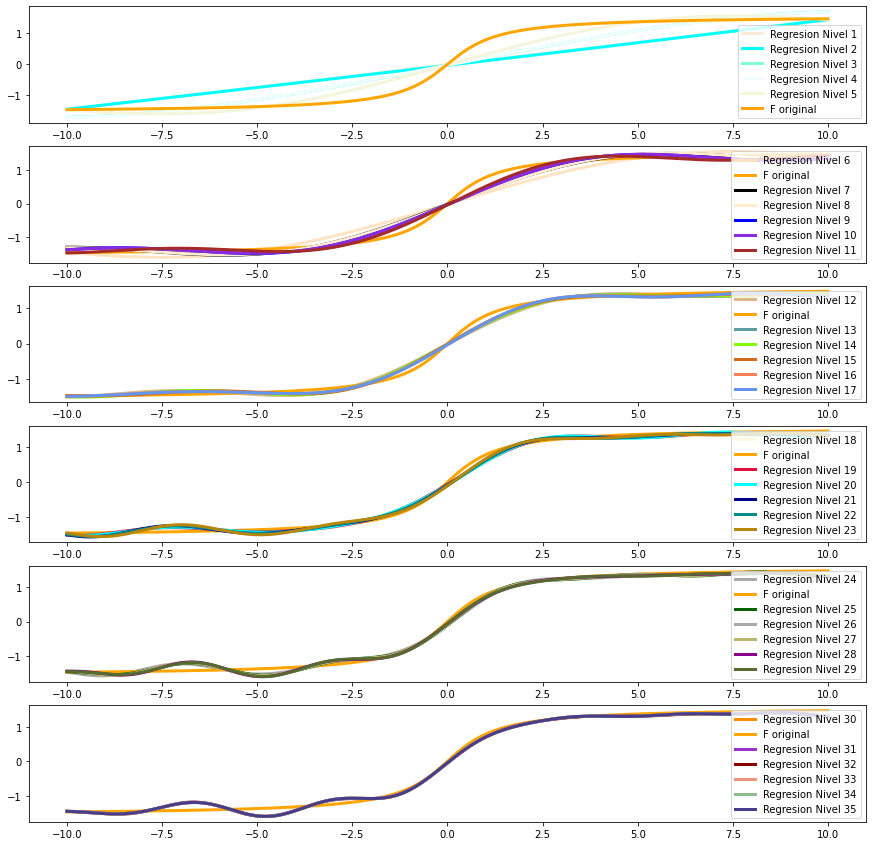

In [250]:
#Hago todas mis regresiones y clasifico contra el grafico de mi fuincion original
#Calculos los errores cuadraticos medios y los agrego a una lista
#Regresiones Polinomicas
colores=list(mcolors.CSS4_COLORS.keys())
cantidadDeRegresionesFrom=1
cantidadDeRegresionesTo=36
regresiones=[]
grafs=int(cantidadDeRegresionesTo**0.5)

#fig,axs=plt.plot(range(len(y_train)),y_train)
figure, axis = plt.subplots(grafs,figsize=(15, 15))
x_range=np.linspace(-10, 10, samples)
minError=999999999999999
minErrorRegresion=9999
errores=[]
for regresion in range(cantidadDeRegresionesFrom,cantidadDeRegresionesTo):
  regresiones.append(np.polyfit(x_train,y_train,regresion))
  #Grafico la regresion
  axis[regresion//grafs].plot(x_range, f_hat(x_range, regresiones[regresion-cantidadDeRegresionesFrom]), linewidth=3.0,color=colores[regresion],label='Regresion Nivel '+str(regresion))
  #Grafico la f original en cada subplot
  if(regresion%grafs==0 or regresion==grafs-1):
    axis[regresion//grafs].plot(x_range, myFunction(x_range), linewidth=3.0,color="Orange",label="F original")
  axis[regresion//grafs].legend()
  #Calculo el error de esta regresion con este linspace(Uso error cuadratico medio)
  error=np.sum(np.abs(f_hat(x_range, regresiones[regresion-cantidadDeRegresionesFrom])-myFunction(x_range))**2)/samples
  #Busco el de menor error
  errores.append(error)
  if(regresion==cantidadDeRegresionesFrom or error<minError):
    minError=error
    minErrorRegresion=regresion
  #print( error)
  #print("Error de regresion" +str(regresion) +" es "+str(error))
#Print original function
#axs.plot(x_range, np.cos(x_range), linewidth=3.0,color="Orange")
#Digo cual es la mejor regresion con el menor nivel de error





El mejor clasificador es la regresion de nivel 17


Text(0.5, 1.0, 'Error de clasificacion')

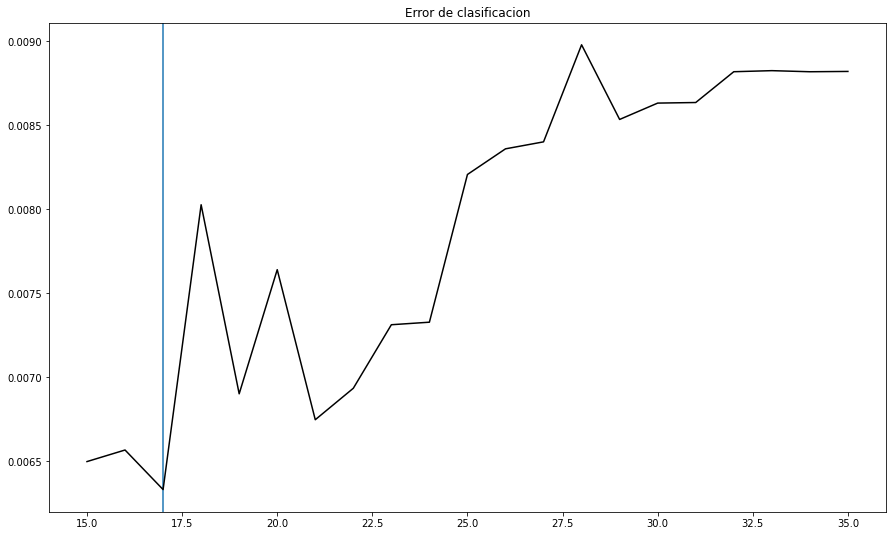

In [251]:
#Imprimo resultados
print("El mejor clasificador es la regresion de nivel "+str(minErrorRegresion))
fig, axs = plt.subplots(1,sharey=True, figsize=(15, 9))
startingGraphic=14
#Uso este numero asi podemos ver como despues del minimo el error empieza a subir
erroresArray=np.array(errores[startingGraphic:cantidadDeRegresionesTo])
plt.axvline(x = minErrorRegresion)
axs.plot(range(startingGraphic+1,cantidadDeRegresionesTo),erroresArray,color="Black")
plt.title("Error de clasificacion")
